# Question-1

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
X_train = np.load('/content/X_kannada_MNIST_train.npz')['arr_0']
y_train = np.load('/content/y_kannada_MNIST_train.npz')['arr_0']

X_test = np.load('/content/X_kannada_MNIST_test.npz')['arr_0']
y_test = np.load('/content/y_kannada_MNIST_test.npz')['arr_0']

In [2]:
def return_key(value, dictionary):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [3]:
def get_class_labels(y, y_matrix_dict):
    y_list = []
    counter = 0
    for i in y:
        if len(y_matrix_dict) == 0:
            y_matrix_dict[counter] = i
            y_list.append(counter)
            counter += 1
        else:
            return_val = return_key(i, y_matrix_dict)
            if return_val == None:
                y_matrix_dict[counter] = i
                y_list.append(counter)
                counter += 1
            else:
                y_list.append(return_val)

    return y_list

In [7]:
y_matrix_dict = {}

y_train = np.array(get_class_labels(y_train, y_matrix_dict))

y_test_list = np.array(get_class_labels(y_test, y_matrix_dict))

In [8]:
# Apply PCA and transform data
def apply_pca(X_train, X_test, n_components):
    # Flatten the image data: from [samples, width, height] to [samples, features]
    nsamples, nx, ny = X_train.shape
    X_train_reshaped = X_train.reshape((nsamples, nx*ny))

    nsamples, nx, ny = X_test.shape
    X_test_reshaped = X_test.reshape((nsamples, nx*ny))

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    return X_train_pca, X_test_pca

In [12]:
# Define and train models
def train_models(X_train, y_train):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Naive Bayes": GaussianNB(),
        "K-NN": KNeighborsClassifier(),
        "SVM": SVC(probability=True)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model
    return models

In [10]:
# Evaluate models
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        results[name] = {'Precision': precision, 'recall': recall, 'f1': f1, 'confusion_matrix': cm, 'roc_auc': roc_auc}
    return results

In [13]:
n_components_list = [10, 15, 20, 25, 30]
for n_components in n_components_list:
    print(f"Running with {n_components} PCA components")
    X_train_pca, X_test_pca = apply_pca(X_train, X_test, n_components)
    models = train_models(X_train_pca, y_train)
    results = evaluate_models(models, X_test_pca, y_test)
    for key, value in results.items():
        print("Printing the {} performance".format(key))
        print(value)

Running with 10 PCA components
Printing the Decision Tree performance
{'Precision': 0.802317585367925, 'recall': 0.8015, 'f1': 0.800670562249124, 'confusion_matrix': array([[746, 144,   5,  47,   2,   3,   1,   5,  39,   8],
       [ 61, 831,   4,  42,  16,  20,   3,   8,   6,   9],
       [  4,   3, 974,   0,   0,  12,   2,   1,   0,   4],
       [ 15,  17,   3, 796,  41,  40,  18,  51,  11,   8],
       [  1,   0,   1,  52, 804,  65,   3,   6,  46,  22],
       [  1,   8,   3,  40, 163, 754,   5,   7,  13,   6],
       [  6,   4,   1,  48,  14,   8, 755, 135,  18,  11],
       [ 13,   7,   2,  82,  30,   8, 181, 628,   5,  44],
       [ 59,  16,   3,   7,  10,  16,   4,   1, 858,  26],
       [ 17,  15,   5,   6,  15,   0,   5,   4,  64, 869]]), 'roc_auc': 0.8897222222222222}
Printing the Random Forest performance
{'Precision': 0.8673462510771256, 'recall': 0.8646, 'f1': 0.8641553091583217, 'confusion_matrix': array([[791, 141,   0,  42,   3,   1,   2,   1,  16,   3],
       [ 27, 90

# Question-2

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')

In [6]:
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
df = pd.read_csv('FinalBalancedDataset.csv')

In [8]:
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
# Perform some data cleaning or pre-processing
df["tweet"] = df["tweet"].str.lower()
df["tweet"] = df["tweet"].str.replace(r"[^\w\s]", "")
df["tweet"] = df["tweet"].str.split().str.join(" ")

<ipython-input-10-3bc645ec7451>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["tweet"] = df["tweet"].str.replace(r"[^\w\s]", "")


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['Toxicity'], test_size=0.2, random_state=42)

In [12]:
# Convert text to Bag of Words
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Convert text to TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [13]:
# Define and train the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

Using the BOW vectorizer features to predict the model

In [14]:
model_results = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1-Score", "ROC-AUC", "Confusion matrix"])
fpr_list = []
tpr_list = []

for model_name, model in models.items():
    with tf.device("/GPU:0"):
        model.fit(X_train_bow, y_train)
    y_pred = model.predict(X_test_bow)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Add new row to model_results
    model_results.loc[len(model_results)] = [model_name, precision, recall, f1, roc_auc, confusion_mat.tolist()]

    # Calculate FPR and TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Append FPR and TPR to respective lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)

In [15]:
print("\nOverall Model Evaluation Results:")
model_results


Overall Model Evaluation Results:


,Model,Precision,Recall,F1-Score,ROC-AUC,Confusion matrix
0,Decision Tree,0.926283,0.906910,0.916494,0.926261,"[[6120, 352], [454, 4423]]"
1,Random Forest,0.933149,0.898708,0.915605,0.925096,"[[6158, 314], [494, 4383]]"
2,Naive Bayes,0.883862,0.925364,0.904137,0.916869,"[[5879, 593], [364, 4513]]"
3,K-NN,0.850279,0.780193,0.813730,0.838335,"[[5802, 670], [1072, 3805]]"
4,SVM,0.963874,0.875333,0.917473,0.925306,"[[6312, 160], [608, 4269]]"


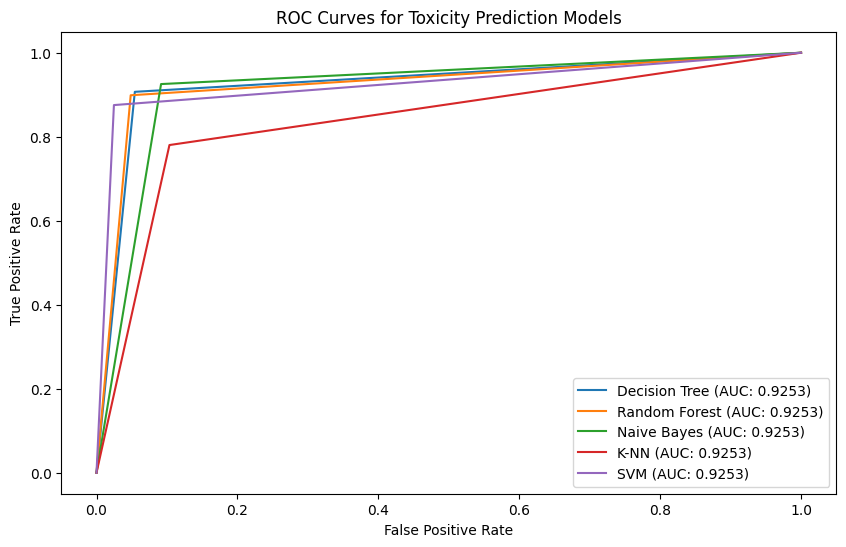

In [16]:
plt.figure(figsize=(10, 6))

for i, (model_name, fpr, tpr) in enumerate(zip(models.keys(), fpr_list, tpr_list)):
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves for Toxicity Prediction Models")
plt.show()

Using the TF-IDF vectorizer features to predict the model

In [17]:
model_results = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1-Score", "ROC-AUC", "Confusion matrix"])
fpr_list = []
tpr_list = []

for model_name, model in models.items():
    with tf.device("/GPU:0"):
        model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Add new row to model_results
    model_results.loc[len(model_results)] = [model_name, precision, recall, f1, roc_auc, confusion_mat.tolist()]

    # Calculate FPR and TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Append FPR and TPR to respective lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)

In [18]:
print("\nOverall Model Evaluation Results:")
model_results


Overall Model Evaluation Results:


,Model,Precision,Recall,F1-Score,ROC-AUC,Confusion matrix
0,Decision Tree,0.911189,0.906705,0.908941,0.920055,"[[6041, 431], [455, 4422]]"
1,Random Forest,0.932933,0.892762,0.912406,0.922200,"[[6159, 313], [523, 4354]]"
2,Naive Bayes,0.913007,0.886611,0.899615,0.911476,"[[6060, 412], [553, 4324]]"
3,K-NN,0.890991,0.734058,0.804947,0.833191,"[[6034, 438], [1297, 3580]]"
4,SVM,0.960387,0.894812,0.926441,0.933500,"[[6292, 180], [513, 4364]]"


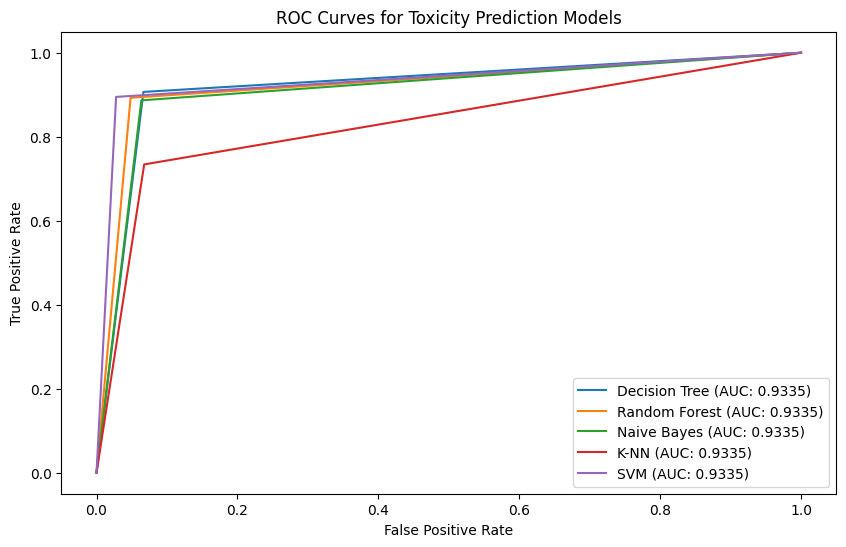

In [19]:
plt.figure(figsize=(10, 6))

for i, (model_name, fpr, tpr) in enumerate(zip(models.keys(), fpr_list, tpr_list)):
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves for Toxicity Prediction Models")
plt.show()

# Question-3

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [6]:
# Load the provided data file
data_train = pd.read_csv('p1_train.csv', names = ['sensor_1', 'sensor_2', 'target'])
data_test = pd.read_csv('p1_test.csv', names = ['sensor_1', 'sensor_2', 'target'])

# Display the first few rows of the dataframe to understand its structure
data_train.head()

,sensor_1,sensor_2,target
0,-7.262173,9.572604,5.358725
1,3.462140,10.684524,-13.275822
2,-12.996801,-3.446163,31.815190
3,7.083537,-14.074146,1.995030
4,-15.216890,-18.630651,48.812452


In [11]:
# Splitting the data into train and test sets
X_train = data_train[['sensor_1', 'sensor_2']]
y_train = data_train['target']
X_test = data_test[['sensor_1', 'sensor_2']]
y_test = data_test['target']

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 5.0464
Mean Absolute Error: 1.7991


# Question-4

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [2]:
# Load the provided data file
data_train = pd.read_csv('p2_train.csv', names = ['sensor_1', 'sensor_2', 'sensor_3', 'target'])
data_test = pd.read_csv('p2_test.csv', names = ['sensor_1', 'sensor_2', 'sensor_3', 'target'])

# Display the first few rows of the dataframe to understand its structure
data_train.head()

,sensor_1,sensor_2,sensor_3,target
0,6.501996,-8.536983,3.422935,119980.220246
1,1.328383,8.943578,-8.145307,29890.224974
2,0.161478,-7.928351,1.628924,3245.579405
3,-8.989890,0.621330,-2.322925,411824.663771
4,5.185118,7.902611,7.559619,176097.137744


In [3]:
# Splitting the data into train and test sets
X_train = data_train[['sensor_1', 'sensor_2', 'sensor_3']]
y_train = data_train['target']
X_test = data_test[['sensor_1', 'sensor_2', 'sensor_3']]
y_test = data_test['target']

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initializing the models
models = {
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Linear Regression": LinearRegression()
}

# Dictionary to store the results
results = {}

# Fitting each model and evaluating on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}

results

{'Support Vector Regression': {'MSE': 77889307850.00328,
  'MAE': 150476.04204523386},
 'Decision Tree Regression': {'MSE': 752633048.5798278,
  'MAE': 13698.692057281745},
 'Random Forest Regression': {'MSE': 317175720.8334695,
  'MAE': 8830.385559428129},
 'Linear Regression': {'MSE': 62332720766.18977, 'MAE': 172939.2986751467}}